# In this notebook, we calculate the Chern number of the Haldane model through symmetry indicators

In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, cos, sin, pi
import sympy as sp
import cmath

In [59]:
def return_symeig(v, k, G1, G2):
    # We assume k is given in cartesian coordinates
    k1, k2 = np.einsum("ij, j->i", np.linalg.inv(np.array([G1, G2]).T), k)
    return np.abs(v[0])**2+np.abs(v[1]**2)*np.exp(1j*k2*2*pi)

In [105]:
def return_haldane_model(topological=False):
    delta = 0.7
    t = -1
    a = 1 #lattice constant
    a_0 = a/sqrt(3) # nearest neighbor distance
    Ea = delta
    Eb = -delta
    
    # lattice vectors
    a1 = np.array([a, 0])
    a2 = np.array([-a/2, a*sqrt(3)/2])
    haldane_lattice = pb.Lattice(a1=a1, a2=a2)
    haldane_lattice.add_sublattices(
        ('A', np.array([0, 0]), Ea), ('B', np.array([0, a_0]), Eb))  # add an atom called 'A' at position [0, 0]
    t = -1
    
    t2 = 0.06*1j # trivial
    if topological: 
        t2 = 0.24*1j # topological
    haldane_lattice.add_hoppings(
        ([0, 0], 'A', 'B', t),
        ([-1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t),
    
        ([1, 0], 'A', 'A', t2),
        ([0, 1], 'A', 'A', t2),
        ([-1, -1], 'A', 'A', t2),
    
        ([1, 0], 'B', 'B', -t2),
        ([0, 1], 'B', 'B', -t2),
        ([-1, -1], 'B', 'B', -t2),
    )
    haldane_model = pb.Model(
        haldane_lattice,
        pb.translational_symmetry()
    )
    return haldane_model 

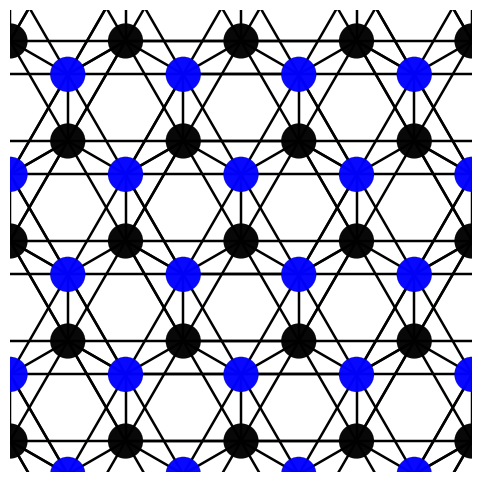

In [106]:
plt.figure(figsize=(6, 6))
haldane_model = return_haldane_model(True)
graphene_model.plot(num_periods=5,
          hopping = {
  "width": 3, "color": "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [107]:
topological_haldane_model = return_haldane_model(True)
trivial_haldane_model = return_haldane_model(False)
topological_solver = pb.solver.lapack(topological_haldane_model)
trivial_solver = pb.solver.lapack(trivial_haldane_model)

G1, G2 = topological_haldane_model.lattice.reciprocal_vectors()

G1 = G1[0:2]
G2 = G2[0:2]
K = 2/3*G1-1/3*G2
Kprime = -K

In [127]:
topological_symeigs = dict()
trivial_symeigs = dict()

for (klab, k) in zip(["K", "Kprime"], [K, Kprime]):
    num_K1 = 0 
    num_K2 = 0
    num_K3 = 0 

    solver = topological_solver
    solver.set_wave_vector(k)
    symeig = return_symeig(solver.eigenvectors[:, 0], k, G1, G2)
    print("C3 symmetry eigenvalue at ", klab, " is ", np.round(symeig, 3))
    if np.isclose(cmath.phase(symeig)/pi, -2/3):
        num_K3 += 1
    if np.isclose(cmath.phase(symeig)/pi, 2/3):
        num_K2 += 1
    if np.isclose(cmath.phase(symeig)/pi, 0):
        num_K1 += 1
    topological_symeigs[klab] = [num_K1, num_K2, num_K3]


for (i, (klab, k)) in enumerate(zip(["K", "Kprime"], [K, Kprime])):
    num_K1 = 0 
    num_K2 = 0
    num_K3 = 0 
    solver = trivial_solver
    solver.set_wave_vector(k)
    symeig = return_symeig(solver.eigenvectors[:, 0], k, G1, G2)
    print("C3 symmetry eigenvalue at ", klab, " is ", np.round(symeig, 3))
    if np.isclose(cmath.phase(symeig)/pi, -2/3):
        num_K3 += 1
    if np.isclose(cmath.phase(symeig)/pi, 2/3):
        num_K2 += 1
    trivial_symeigs[klab] = [num_K1, num_K2, num_K3]
    

C3 symmetry eigenvalue at  K  is  (1-0j)
C3 symmetry eigenvalue at  Kprime  is  (-0.5+0.866j)
C3 symmetry eigenvalue at  K  is  (-0.5-0.866j)
C3 symmetry eigenvalue at  Kprime  is  (-0.5+0.866j)


Therefore, at Kprime we have one K2 eigenvalue at K we have one K1 eigenvalue. Therefore, by the formula given in https://journals.aps.org/prb/abstract/10.1103/PhysRevB.108.085116, 
the Chern number is given by 1 mod three

In [128]:
def return_chern_number(symeigs_dict):
    K1, K2, K3 = symeigs_dict["K"]
    Kprime1, Kprime2, Kprime3 = symeigs_dict["Kprime"]
    return (K1-1) +2*(K2)-2*(Kprime1-1)-Kprime2
    

In [129]:
return_chern_number(topological_symeigs)

1

In [130]:
return_chern_number(trivial_symeigs)

0